In [9]:
from rsna_retro.imports import *
from rsna_retro.metadata import *
from rsna_retro.preprocess import *
from rsna_retro.train import *
from rsna_retro.train3d import *
from rsna_retro.trainfull3d_labels import *

In [10]:
torch.cuda.set_device(3)

In [11]:
dls = get_3d_dls_aug(Meta.df_comb, sz=128, bs=32, grps=Meta.grps_stg1)

## Model

In [12]:
m = xres3d().cuda()
learn = get_learner(dls, m, get_loss())

In [13]:
learn.add_cb(RowLoss())

In [14]:
# learn.load(f'runs/baseline_stg1_xresnet18-3', strict=False)

In [15]:
name = 'trainfull3d_labels_full3d'

## Training

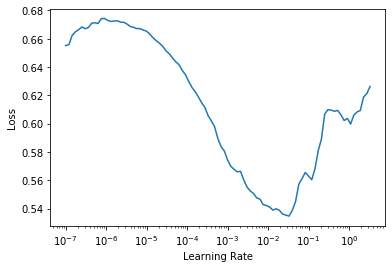

In [18]:
# learn.lr_find()

In [ ]:
do_fit(learn, 12, 1e-2)
learn.save(f'runs/{name}-1')

epoch,train_loss,valid_loss,accuracy_multi,accuracy_any,time


In [ ]:
leaern.dls = get_3d_dls_aug(Meta.df_comb, sz=256, bs=16, grps=Meta.grps_stg1)
do_fit(learn, 12, 1e-3)
learn.save(f'runs/{name}-2')

In [ ]:
learn.dls = get_3d_dls_aug(Meta.df_comb, sz=384, bs=8, img_dir=path_jpg, grps=Meta.grps_stg1)
do_fit(learn, 4, 1e-4)
learn.save(f'runs/{name}-3')

## Test

In [12]:
learn.load(f'runs/{name}-2-no256', strict=True)
sub_fn = f'subm/{name}'

In [13]:
learn.dls = get_3d_dls_aug(Meta.df_tst, sz=384, path=path_tst_jpg, bs=8, test=True)

In [15]:
preds,targs = learn.get_preds()

In [16]:
preds.shape, preds.min(), preds.max()

(torch.Size([121232, 6]), tensor(2.5437e-13), tensor(1.0000))

In [17]:
pred_csv = submission(Meta.df_tst, preds, fn=sub_fn)

In [18]:
pred_csv

,ID,Label
0,ID_714683b15_any,0.0000760248
1,ID_714683b15_epidural,0.0000175029
2,ID_714683b15_intraparenchymal,0.0000051337
3,ID_714683b15_intraventricular,0.0000005286
4,ID_714683b15_subarachnoid,0.0000177786
...,...,...
727387,ID_0abae0d75_epidural,0.0000006036
727388,ID_0abae0d75_intraparenchymal,0.0000011455
727389,ID_0abae0d75_intraventricular,0.0000018162
727390,ID_0abae0d75_subarachnoid,0.0000015535


In [19]:
api.competition_submit(f'{sub_fn}.csv', name, 'rsna-intracranial-hemorrhage-detection')

100%|██████████| 26.0M/26.0M [00:02<00:00, 9.15MB/s]


Successfully submitted to RSNA Intracranial Hemorrhage Detection

In [21]:
api.competitions_submissions_list('rsna-intracranial-hemorrhage-detection')[0]

{'ref': 14319806,
 'totalBytes': 27277209,
 'date': '2020-01-29T07:23:45.623Z',
 'description': 'train3d_baseline_pretrained',
 'errorDescription': None,
 'fileName': 'train3d_baseline_pretrained.csv',
 'publicScore': '1.01295',
 'privateScore': '0.05579',
 'status': 'complete',
 'submittedBy': 'Andrew Shaw',
 'submittedByRef': 'bearpelican',
 'teamName': 'Andrew Shaw',
 'type': 'standard',
 'url': 'https://www.kaggle.com/submissions/14319806/14319806.raw'}